In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
pip install wquantiles

In [3]:
import wquantiles

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data_csv = '/content/drive/My Drive/CODE_ALPHA/google.csv'
google=pd.read_csv(data_csv)
google.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
1,2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
3,2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
4,2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [7]:
google.describe()

,High,Low,Open,Close,Volume,Adj Close
count,4317.000000,4317.000000,4317.000000,4317.000000,4.317000e+03,4317.000000
mean,639.682936,627.615621,633.603748,633.852357,6.523837e+06,633.852357
std,561.783142,552.069438,556.527532,557.255541,7.830526e+06,557.255541
min,50.680038,47.800831,49.409801,49.818268,7.922000e+03,49.818268
25%,247.507278,241.469910,244.832306,244.334183,1.593563e+06,244.334183
50%,401.988251,395.168823,399.004425,398.561096,3.851583e+06,398.561096
75%,933.440002,923.030029,929.059998,928.799988,8.268878e+06,928.799988
max,2936.409912,2912.290039,2918.989990,2916.840088,8.254163e+07,2916.840088


array([[<Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Adj Close'}>]], dtype=object)

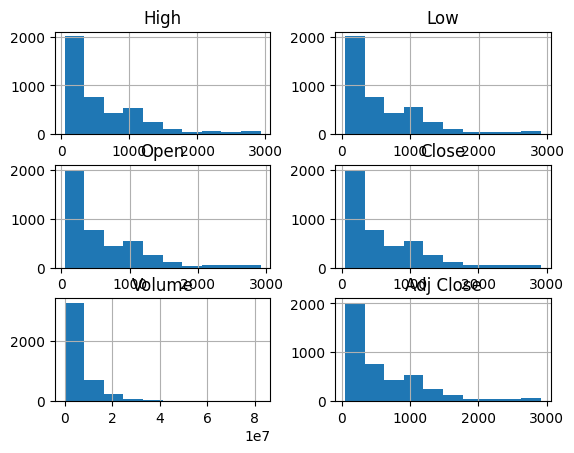

In [8]:
google.hist()

In [9]:
google.shape

(4317, 7)

In [10]:
google.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [11]:
srt=google.sort_values(by='Date')
srt.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
1,2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
3,2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
4,2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [12]:
srt.reset_index(inplace=True)

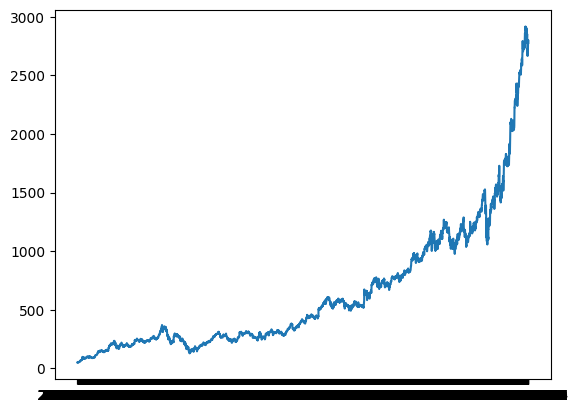

In [13]:
plt.plot(srt['Date'],srt['Close'])

In [14]:
data = google['Close'].values.reshape(-1, 1)

In [15]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

In [16]:
#Create sequences for LSTM
sequence_length = 50
X, y = [], []
for i in range(len(data_normalized) - sequence_length):
    X.append(data_normalized[i:i+sequence_length, 0])
    y.append(data_normalized[i+sequence_length, 0])

X, y = np.array(X), np.array(y)


In [17]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 (124.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
107/107 [==============================] - 10s 54ms/step - loss: 0.0047
Epoch 2/10
107/107 [==============================] - 5s 43ms/step - loss: 1.3021e-04
Epoch 3/10
107/107 [==============================] - 6s 54ms/step - loss: 1.1902e-04
Epoch 4/10
107/107 [==============================] - 5s 47ms/step - loss: 1.1759e-04
Epoch 5/10
107/107 [==============================] - 5s 43ms/step - loss: 1.1393e-04
Epoch 6/10
107/107 [==============================] - 6s 59ms/step - loss: 1.2933e-04
Epoch 7/10
107/107 [==============================] - 5s 43ms/step - loss: 1.1524e-04
Epoch 8/10
107/107 [==============================] - 4s 41ms/step - loss: 1.0561e-04
Epoch 9/10
107/107 [==============================] - 7s 69ms/step - loss: 1.0037e-04
Epoch 10/10
107/107 [==============================] - 5s 48ms/step - loss: 1.1051e-04


In [22]:
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

print(f'Training Loss: {train_loss}')
print(f'Testing Loss: {test_loss}')

Training Loss: 8.616427658125758e-05
Testing Loss: 8.901388355297968e-05


In [25]:
# Train-test split
train_size = int(len(data) * 0.8)
train, valid = google[0:train_size], google[train_size:]

In [24]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

27/27 [==============================] - 2s 19ms/step


In [26]:
valid_df = pd.DataFrame(valid['Close'].values, columns=['Close'], index=valid.index)

In [27]:
valid_df = valid_df.head(len(predictions))

In [28]:
# Create a new DataFrame for predictions with the correct indices
predictions_df = pd.DataFrame(predictions, index=valid_df.index, columns=['Predictions'])

In [29]:
# Concatenate the 'valid_reset' DataFrame with the predictions DataFrame
result_df = pd.concat([valid_df, predictions_df], axis=1)

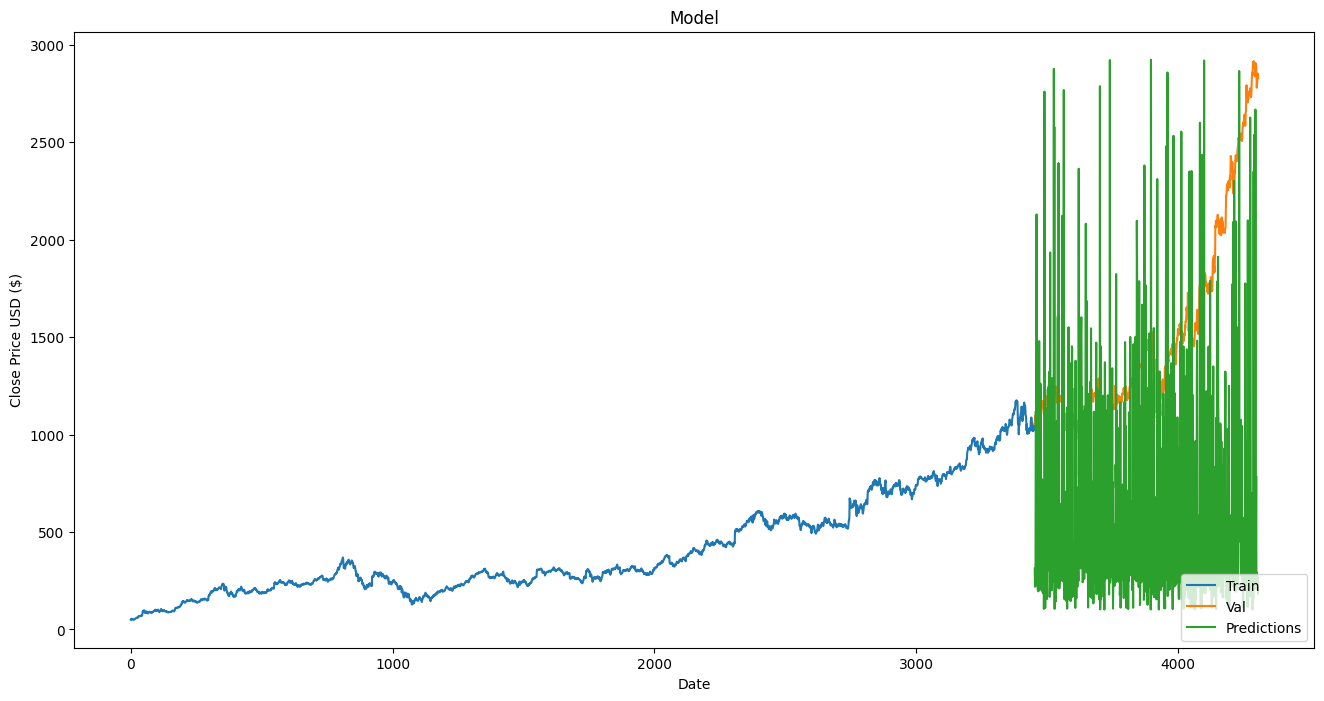

In [30]:
# Visualize the results
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(result_df[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()